In [4]:
import pandas as pd
import os
import seaborn as sns

In [5]:
path_to_metadata = 'metadata_table.txt'
meta_df = pd.read_csv(path_to_metadata, delimiter = '\t', skiprows = [1])

In [6]:
meta_df.head()

,#SampleID,MouseId,TSampleId,Treatment,TreatmentDate,TreatmentDateCat,TreatmentExt,MiSeqId2
0,1,Ciprofloxacin_0.1_1,1_S1,Ciprofloxacin_0.1,6/22/2018,622.0,Ciprofloxacin_0.1_622,1
1,2,Ciprofloxacin_0.1_2,2_S2,Ciprofloxacin_0.1,6/22/2018,622.0,Ciprofloxacin_0.1_622,2
2,3,Ciprofloxacin_0.1_3,3_S3,Ciprofloxacin_0.1,6/22/2018,622.0,Ciprofloxacin_0.1_622,3
3,4,Ciprofloxacin_0.1_4,4_S4,Ciprofloxacin_0.1,6/22/2018,622.0,Ciprofloxacin_0.1_622,4
4,5,Ciprofloxacin_0.1_5,5_S5,Ciprofloxacin_0.1,6/22/2018,622.0,Ciprofloxacin_0.1_622,5


In [7]:
def get_data_for_sample(path_to_file):
    df = pd.read_csv(path_to_file, delimiter = '\t')
    sample_id = '_'.join(path_to_file.split('/')[-1].split('_')[0:2])
    df['TSampleId'] = sample_id
    try:
        df['Treatment'] = meta_df.loc[meta_df['TSampleId'] == sample_id]['Treatment'].item()
        df = df[['TSampleId', 'Treatment', 'name', 'taxonomy_lvl', 'new_est_reads', 'fraction_total_reads']]
        return df
    except: 
        print(meta_df.loc[meta_df['TSampleId'] == sample_id]['Treatment'])
        print("Sample Id '", sample_id, "' is not found'") 

In [8]:
path_to_file = '//gfs/data/SE-OM/Klebsiella/trimmed_bracken/1_S1_L001_C.bracken_report.txt'
df1 = get_data_for_sample(path_to_file)

In [9]:
df1

,TSampleId,Treatment,name,taxonomy_lvl,new_est_reads,fraction_total_reads
0,1_S1,Ciprofloxacin_0.1,Bacteroidia,C,91174,0.65600
1,1_S1,Ciprofloxacin_0.1,Gammaproteobacteria,C,45382,0.32653
2,1_S1,Ciprofloxacin_0.1,Alphaproteobacteria,C,72,0.00052
3,1_S1,Ciprofloxacin_0.1,Deltaproteobacteria,C,66,0.00048
4,1_S1,Ciprofloxacin_0.1,Clostridia,C,2044,0.01471
5,1_S1,Ciprofloxacin_0.1,Bacilli,C,37,0.00027
6,1_S1,Ciprofloxacin_0.1,Verrucomicrobiae,C,127,0.00092
7,1_S1,Ciprofloxacin_0.1,Actinobacteria,C,79,0.00057


In [10]:
df = pd.read_csv(path_to_file, delimiter = '\t')

In [11]:
df

,name,taxonomy_id,taxonomy_lvl,kraken_assigned_reads,added_reads,new_est_reads,fraction_total_reads
0,Bacteroidia,912,C,90819,355,91174,0.65600
1,Gammaproteobacteria,3303,C,43898,1484,45382,0.32653
2,Alphaproteobacteria,2379,C,72,0,72,0.00052
3,Deltaproteobacteria,3087,C,66,0,66,0.00048
4,Clostridia,1859,C,1955,89,2044,0.01471
5,Bacilli,1673,C,35,2,37,0.00027
6,Verrucomicrobiae,4029,C,127,0,127,0.00092
7,Actinobacteria,419,C,79,0,79,0.00057


In [12]:
path = '//gfs/data/SE-OM/Klebsiella/trimmed_bracken/'

files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.txt' in file:
            files.append(os.path.join(r, file))


In [13]:
files[30]

'//gfs/data/SE-OM/Klebsiella/trimmed_bracken/32_S32_L001_S.bracken_report.txt'

In [14]:
df_list = []
for file in files:
    df = get_data_for_sample(file)
    if df is not None:
        df_list.append(get_data_for_sample(file))
df_union_all= pd.concat(df_list)

Series([], Name: Treatment, dtype: object)
Sample Id ' KAR_1 ' is not found'
Series([], Name: Treatment, dtype: object)
Sample Id ' KAR_2 ' is not found'
Series([], Name: Treatment, dtype: object)
Sample Id ' KAR_5 ' is not found'
Series([], Name: Treatment, dtype: object)
Sample Id ' KAR_6 ' is not found'
Series([], Name: Treatment, dtype: object)
Sample Id ' KAR_3 ' is not found'
Series([], Name: Treatment, dtype: object)
Sample Id ' KAR_1 ' is not found'
Series([], Name: Treatment, dtype: object)
Sample Id ' KAR_2 ' is not found'
Series([], Name: Treatment, dtype: object)
Sample Id ' KAR_5 ' is not found'
Series([], Name: Treatment, dtype: object)
Sample Id ' KAR_6 ' is not found'
Series([], Name: Treatment, dtype: object)
Sample Id ' KAR_4 ' is not found'
Series([], Name: Treatment, dtype: object)
Sample Id ' KAR_1 ' is not found'
Series([], Name: Treatment, dtype: object)
Sample Id ' KAR_2 ' is not found'
Series([], Name: Treatment, dtype: object)
Sample Id ' KAR_5 ' is not found'

In [15]:
df_union_all

,TSampleId,Treatment,name,taxonomy_lvl,new_est_reads,fraction_total_reads
0,19_S19,Ceftazidime_0.1,Muribaculaceae,F,65203,0.49823
1,19_S19,Ceftazidime_0.1,Bacteroidaceae,F,27395,0.20934
2,19_S19,Ceftazidime_0.1,Prevotellaceae,F,17232,0.13167
3,19_S19,Ceftazidime_0.1,Rikenellaceae,F,1421,0.01086
4,19_S19,Ceftazidime_0.1,Tannerellaceae,F,1595,0.01219
5,19_S19,Ceftazidime_0.1,Marinilabiliaceae,F,435,0.00333
6,19_S19,Ceftazidime_0.1,Porphyromonadaceae,F,392,0.00300
7,19_S19,Ceftazidime_0.1,Dysgonomonadaceae,F,286,0.00219
8,19_S19,Ceftazidime_0.1,uncultured,F,156,0.00119
9,19_S19,Ceftazidime_0.1,Barnesiellaceae,F,116,0.00089


In [16]:
df_P = df_union_all.loc[df_union_all['taxonomy_lvl'] == 'P']
df_P['Antibiotics'] = ['No' if i == 'Control' else 'Yes' for i in df_P['Treatment']]

/gfs/progs/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [209]:
df_P_Bacteroidetes = df_P.loc[[(i in ['Bacteroidetes', 'Actinobacteria', 'Firmicutes', 
                              'Verrucomicrobia', 'Proteobacteria']) for i in df_P['name']]]

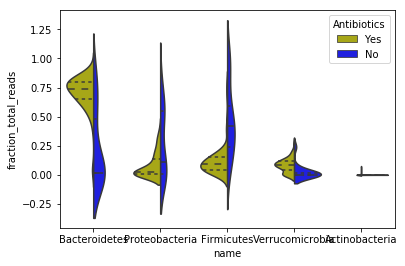

In [211]:
sns.violinplot(x="name", y="fraction_total_reads", hue="Antibiotics",
               split=True, inner="quart",
               palette={"Yes": "y", "No": "b"},
               data=df_P_Bacteroidetes)

Alpha diversity
    - counting species for samples

In [230]:
df_G = df_union_all.loc[df_union_all['taxonomy_lvl'] == 'G']

df_G_count = df_G[["TSampleId", "Treatment", "name"]].groupby(["TSampleId", "Treatment"]).count()

In [232]:
df_G_count["GenusCount"] = df_G_count["name"]

In [235]:
df_G_count = df_G_count.reset_index()
df_G_count = df_G_count[["TSampleId", 'Treatment', 'GenusCount']]

In [237]:
df_G_count['Antibiotics'] = ['No' if i == 'Control' else 'Yes' for i in df_G_count['Treatment']]

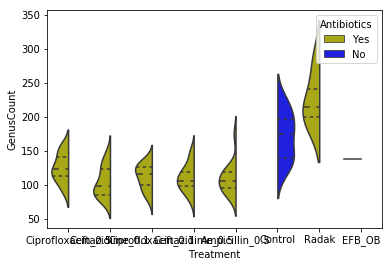

In [239]:
sns.violinplot(x="Treatment", y="GenusCount", hue="Antibiotics",
               split=True, inner="quart",
               palette={"Yes": "y", "No": "b"},
               data=df_G_count)

[Text(0, 0, 'Ciprofloxacin_0.5'),
 Text(0, 0, 'Ceftazidime_0.1'),
 Text(0, 0, 'Ciprofloxacin_0.1'),
 Text(0, 0, 'Ceftazidime_0.5'),
 Text(0, 0, 'Ampicillin_0.5'),
 Text(0, 0, 'Control'),
 Text(0, 0, 'Radak'),
 Text(0, 0, 'EFB_OB')]

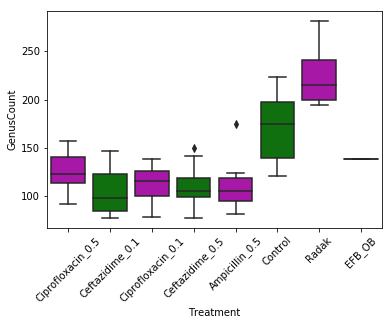

In [253]:
plt = sns.boxplot(x="Treatment", y="GenusCount", palette=["m", "g"],
            data=df_G_count)
plt.set_xticklabels(plt.get_xticklabels(),rotation=45)

In [3]:
from skbio import TreeNode
from io import StringIO

In [2]:
import skbio

In [18]:
df_P.head()

,TSampleId,Treatment,name,taxonomy_lvl,new_est_reads,fraction_total_reads,Antibiotics
0,11_S11,Ciprofloxacin_0.5,Bacteroidetes,P,127506,0.70613,Yes
1,11_S11,Ciprofloxacin_0.5,Firmicutes,P,25400,0.14067,Yes
2,11_S11,Ciprofloxacin_0.5,Verrucomicrobia,P,18288,0.10128,Yes
3,11_S11,Ciprofloxacin_0.5,Proteobacteria,P,7759,0.04297,Yes
4,11_S11,Ciprofloxacin_0.5,Cyanobacteria,P,1013,0.00561,Yes


In [19]:
sampleids = df_P["TSampleId"].drop_duplicates()

In [29]:
names = df_P["name"].drop_duplicates()
names = list(names)
names.sort()
print(names)

['Acidobacteria', 'Actinobacteria', 'Armatimonadetes', 'BRC1', 'Bacteroidetes', 'Calditrichaeota', 'Chloroflexi', 'Cyanobacteria', 'Deferribacteres', 'Dependentiae', 'Elusimicrobia', 'Epsilonbacteraeota', 'Euryarchaeota', 'Fibrobacteres', 'Firmicutes', 'Gemmatimonadetes', 'Halanaerobiaeota', 'Hydrogenedentes', 'Kiritimatiellaeota', 'Latescibacteria', 'Lentisphaerae', 'Margulisbacteria', 'Marinimicrobia (SAR406 clade)', 'Patescibacteria', 'Planctomycetes', 'Proteobacteria', 'Spirochaetes', 'Synergistetes', 'Tenericutes', 'Verrucomicrobia']


In [47]:
data = []
for sample in sampleids:
    rows = df_P.loc[df_P["TSampleId"] == sample]
    values = []
    for name in names:
        value = rows.loc[rows["name"] == name]
        if len(value) > 0:
            try:
                values.append(int(value.new_est_reads))
            except:
                print(value.new_est_reads)
        else:
            values.append(0)
    data.append(values)
        

In [51]:
ids = sampleids

In [52]:
from skbio.diversity import alpha_diversity
adiv_obs_otus = alpha_diversity('observed_otus', data, ids)

In [53]:
adiv_obs_otus

TSampleId
11_S11    13
18_S18    13
30_S30    11
24_S24    11
33_S33    12
14_S14    12
20_S20    12
27_S27    11
10_S10     8
17_S17    10
2_S2       7
23_S23     9
26_S26    14
1_S1       6
32_S32     9
13_S13    11
35_S35    11
16_S16     8
22_S22    12
29_S29    10
19_S19    11
25_S25    11
12_S12     9
31_S31     9
28_S28     8
21_S21     9
34_S34     8
15_S15    12
37_S37    12
4_S4       9
          ..
65_S65    10
61_S61    10
84_S84    12
78_S78    13
68_S68    12
80_S80    12
74_S74    10
64_S64    11
70_S70     8
77_S77     8
83_S83    17
67_S67    11
7_S7      10
73_S73    13
86_S86    11
76_S76    12
6_S6      11
63_S63    15
66_S66    13
82_S82    19
72_S72    12
85_S85    12
88_S88    15
79_S79    15
87_S87    11
90_S90    17
8_S8      10
89_S89    12
9_S9      12
91_S91    21
Length: 91, dtype: int64

In [54]:
from skbio.diversity import beta_diversity
bc_dm = beta_diversity("braycurtis", data, ids)

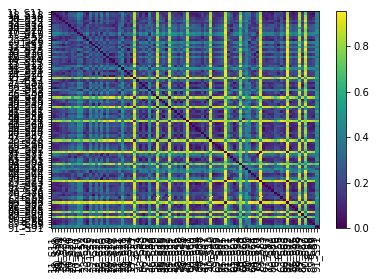

In [55]:
bc_dm

In [ ]:
tree = TreeNode.read(StringIO(
...                      '(((((OTU1:0.5,OTU2:0.5):0.5,OTU3:1.0):1.0):0.0,'
...                      '(OTU4:0.75,(OTU5:0.5,(OTU6:0.5,OTU7:0.5):0.5):'
...                      '0.5):1.25):0.0)root;'))
otu_ids = ['OTU1', 'OTU2', 'OTU3', 'OTU4', 'OTU5', 'OTU6', 'OTU7']

In [57]:
tree1 = TreeNode.read(StringIO("((A:0.1, B:0.2)C:0.3, D:0.4, E:0.5)root;"))

In [59]:
print(tree1.ascii_art())

                    /-A
          /C-------|
         |          \-B
-root----|
         |--D
         |
          \-E
